# Garment productivit

# Importing Libraries

In [93]:

#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing Seaborn for statistical data visualization, built on top of Matplotlib.

import warnings
from rich import print
#-------------------------------------------------------------------------------------------------------------------------------

In [94]:
import matplotlib_inline.backend_inline

# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# Set max rows displayed for readability
#pd.set_option("display.max_rows", 6)

warnings.filterwarnings('ignore')

# Data Understanding




### Data Acquisition & Description

a. How was it collected?

This dataset includes important attributes of the garment manufacturing process, it it's sent by our professor in the university.

c. The datasets used for the analysis is

dataProductivity Prediction of Garment Employeese.csv in my github account exactly in the folder data.

<hr>

### Data Information
Importing Data Set

In [95]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/ziedtuihri/Data_Science_Projects/refs/heads/main/data/dataProductivity%20Prediction%20of%20Garment%20Employeese.csv",
)
df.head()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,NaN,0.0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1.0,0.75,3.94,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12.0,0.80,11.41,NaN,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6.0,NaN,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382


In [96]:
df.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1297,3/3/2015,Quarter1,finishing,Tuesday,2.0,0.4,3.90,NaN,6300.0,0.0,0.0,0.0,0.0,15.0,0.567378
1298,2/24/2015,Quarter4,finishing,Tuesday,9.0,0.7,2.90,NaN,1800.0,0.0,0.0,0.0,0.0,15.0,0.726933
1299,2/14/2015,Quarter2,sweing,Saturday,11.0,0.6,11.41,1039.0,2280.0,23.0,0.0,0.0,NaN,55.0,0.600448
1300,2/11/2015,Quarter2,finishing,Wednesday,12.0,0.8,4.08,NaN,1080.0,0.0,0.0,0.0,0.0,9.0,1.020000
1301,2/25/2015,Quarter4,sweing,Wednesday,4.0,0.8,30.10,323.0,4080.0,50.0,0.0,0.0,1.0,59.0,0.800809


In [97]:
print('Data Shape:', df.shape)

Data Shape:
(1302, 15)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1272 non-null   object 
 1   quarter                1279 non-null   object 
 2   department             1275 non-null   object 
 3   day                    1274 non-null   object 
 4   team                   1278 non-null   float64
 5   targeted_productivity  1279 non-null   float64
 6   smv                    1276 non-null   float64
 7   wip                    729 non-null    float64
 8   over_time              1276 non-null   float64
 9   incentive              1275 non-null   float64
 10  idle_time              1275 non-null   float64
 11  idle_men               1278 non-null   float64
 12  no_of_style_change     1279 non-null   float64
 13  no_of_workers          1280 non-null   float64
 14  actual_productivity    1267 non-null   float64
dtypes: f

# Converting the date object column to datetime

In [130]:
df['date']= pd.to_datetime(df['date'])

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1272 non-null   datetime64[ns]
 1   quarter                1302 non-null   object        
 2   department             1302 non-null   object        
 3   day                    1302 non-null   object        
 4   team                   1278 non-null   float64       
 5   targeted_productivity  1279 non-null   float64       
 6   smv                    1276 non-null   float64       
 7   wip                    1302 non-null   float64       
 8   over_time              1276 non-null   float64       
 9   incentive              1275 non-null   float64       
 10  idle_time              1302 non-null   int64         
 11  idle_men               1302 non-null   int64         
 12  no_of_style_change     1279 non-null   float64       
 13  no_

In [133]:
def find_daterange(quarter):
    print('Dates between '+ df[df['quarter'] == quarter]['date'].min().strftime('%m/%d/%Y') +
          ' and ' + df[df['quarter'] == quarter]['date'].max().strftime('%m/%d/%Y') +
          ' in ' + quarter)

find_daterange('Quarter1')
find_daterange('Quarter2')
find_daterange('Quarter3')
find_daterange('Quarter4')
find_daterange('Quarter5')

Dates between 01/01/2015 and 03/07/2015 in Quarter1

Dates between 01/08/2015 and 03/11/2015 in Quarter2

Dates between 01/15/2015 and 02/19/2015 in Quarter3

Dates between 01/22/2015 and 02/28/2015 in Quarter4

Dates between 01/29/2015 and 01/31/2015 in Quarter5

In [99]:
#descriptive analytics
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1278.000000,1279.000000,1276.000000,729.000000,1276.000000,1275.000000,1275.000000,1278.000000,1279.000000,1280.000000,1267.000000
mean,6.443662,0.730274,15.061418,1148.422497,4551.332288,36.967843,0.688235,0.357590,0.146990,34.553906,0.734889
std,3.468331,0.096727,10.989957,1596.736245,3347.164546,155.419707,12.316019,3.191313,0.422717,22.256752,0.173802
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,762.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650173
50%,7.000000,0.750000,15.260000,1040.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.763375
75%,9.000000,0.800000,24.260000,1255.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850354
max,12.000000,0.800000,54.560000,21540.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [100]:
#checking for missing values
df.isnull().sum()

#573 null values in work in progress

,0
date,30
quarter,23
department,27
day,28
team,24
targeted_productivity,23
smv,26
wip,573
over_time,26
incentive,27


In [101]:

# Checking for duplicates
df.duplicated().sum()

#no duplicates in the dataset

105

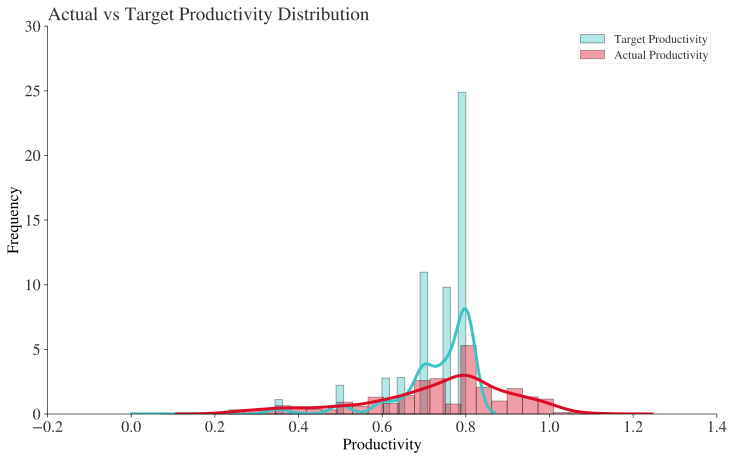

In [102]:

fig,ax =plt.subplots(figsize=(12, 7))
sns.set_color_codes("dark")
sns.set_palette(sns.color_palette("deep"))
sns.distplot(df["targeted_productivity"] , label='Target Productivity' , color="#3dc3c4");
sns.distplot(df["actual_productivity"] , label='Actual Productivity' , color="#dd0b25");
plt.xlabel('Productivity')
plt.ylabel('Frequency')
plt.title('Actual vs Target Productivity Distribution')
plt.legend()

In [103]:
df['quarter'].value_counts().sort_index()

,count
quarter,
Quarter1,386
Quarter2,362
Quarter3,224
Quarter4,259
Quarter5,48


In [104]:
df['team'].value_counts().sort_index()

,count
team,
1.0,112
2.0,118
3.0,95
4.0,112
5.0,104
6.0,97
7.0,106
8.0,117
9.0,110


Text(0, 0.5, '')

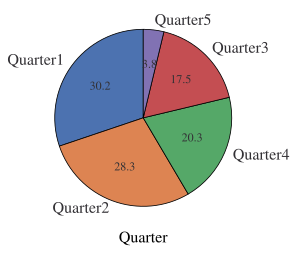

In [105]:
df['quarter'].value_counts().plot(kind='pie',startangle=90,autopct='%.1f')
plt.xlabel('Quarter')
plt.ylabel('')

In [106]:
df['department'].value_counts()

,count
department,
sweing,734
finishing,272
finishing,269


In [107]:
df['department']=df['department'].str.strip()

In [108]:
df['department'] = df['department'].str.replace("sweing", "sewing")

In [109]:
df['department'].value_counts()

,count
department,
sewing,734
finishing,541


In [110]:
df[df['department']== 'finishing']['wip'].isnull().sum()

541

In [111]:
df['wip'].fillna(value=0, inplace=True)

In [112]:
df['wip'].isnull().sum()


0

In [113]:
#checking for missing values
df.isnull().sum()

#573 null values in work in progress



,0
date,30
quarter,23
department,27
day,28
team,24
targeted_productivity,23
smv,26
wip,0
over_time,26
incentive,27


In [114]:

# Checking for duplicates
df.duplicated().sum()

#no duplicates in the dataset

105

In [115]:

#checking for anomalies

#number of workers in each team should be a whole number
df['no_of_workers'].unique()

#there are some values with decimal points.



array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. , 18. , 60. , 12. , 20. ,
       17. , 56.5, 54.5,  nan, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. ,
       32. , 58.5, 15. ,  5. , 57. , 53. , 51.5,  2. ,  9. ,  7. , 19. ,
       28. , 34. , 89. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. ,
       11. , 33.5, 22. , 26. , 27. , 59.5, 50. , 44. , 49. , 47. , 48. ,
       42. , 24. , 45. , 46. , 39. , 38. ,  6. ])

In [116]:
# Option 1: Fill NaN values with 0 before converting
df['no_of_workers'] = df['no_of_workers'].fillna(0).apply(lambda x: int(x))


df['no_of_workers'] = df['no_of_workers'].apply(lambda x: int(x))

In [117]:

#checking that the figures were truncated

df['no_of_workers'].unique()

array([59,  8, 30, 56, 57, 55, 54, 18, 60, 12, 20, 17,  0, 29, 31, 58, 10,
       16, 32, 15,  5, 53, 51,  2,  9,  7, 19, 28, 34, 89, 14, 25, 52,  4,
       21, 35, 33, 11, 22, 26, 27, 50, 44, 49, 47, 48, 42, 24, 45, 46, 39,
       38,  6])

In [118]:



#separating variables for ease of analysis to those that can
#be considered continuous and categorical
cat = ["quarter", "department", "day", "team", "no_of_style_change"]
contin = ["targeted_productivity", "smv", "wip", "over_time", "idle_men", "incentive", "idle_time", "no_of_workers", "actual_productivity"]

In [119]:

#checking for anomalies

#None of the values in the continuous columns should be negative
for col in contin:
  print(len(df[df[col] < 0]))
#none had values < 0

0

0

0

0

0

0

0

0

0

In [120]:

#checking for anomalies

for col in cat:
  print(col)
  print(df[col].unique())


  print('\n')

quarter

['Quarter1' nan 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

department

['sewing' 'finishing' nan]

day

['Thursday' nan 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

team

[ 8.  1. 11. 12.  6.  7.  2.  3.  9. 10.  5.  4. nan]

no_of_style_change

[ 0. nan  1.  2.]

In [121]:

#exploring the anomalous quarter5
df[df['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sewing,Thursday,2.0,0.80,22.52,1416.0,6840.0,113.0,0.0,0.0,0.0,57,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4.0,0.80,NaN,0.0,1200.0,0.0,0.0,0.0,0.0,10,0.989000
500,1/29/2015,Quarter5,sewing,NaN,3.0,0.80,22.52,1287.0,6840.0,100.0,0.0,0.0,0.0,57,0.950186
501,1/29/2015,Quarter5,sewing,Thursday,4.0,0.80,22.52,1444.0,6900.0,88.0,NaN,0.0,0.0,57,0.900800
502,1/29/2015,Quarter5,sewing,Thursday,10.0,0.80,22.52,1088.0,6720.0,88.0,0.0,0.0,0.0,56,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6.0,0.50,2.90,0.0,NaN,0.0,0.0,0.0,0.0,10,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8.0,0.65,4.15,0.0,960.0,0.0,0.0,0.0,0.0,8,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11.0,0.60,2.90,0.0,960.0,0.0,0.0,0.0,0.0,8,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10.0,0.80,3.94,0.0,1200.0,0.0,0.0,0.0,0.0,10,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1.0,0.75,3.94,0.0,1200.0,0.0,0.0,0.0,0.0,10,0.853667


In [122]:
# Fill missing 'day' values based on the previous row's 'day' value
for i in range(1, len(df)):  # start from the second row
    if pd.isna(df.loc[i, 'day']):  # check if 'day' is NaN
        df.loc[i, 'day'] = df.loc[i - 1, 'day']  # fill with the previous row's 'day'

print(df)

date   quarter department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1     sewing   Thursday   8.0                   0.80   
1      1/1/2015  Quarter1  finishing   Thursday   1.0                   0.75   
2      1/1/2015  Quarter1     sewing   Thursday  11.0                   0.80   
3      1/1/2015  Quarter1     sewing   Thursday  12.0                   0.80   
4      1/1/2015  Quarter1     sewing   Thursday   6.0                    NaN   
...         ...       ...        ...        ...   ...                    ...   
1297   3/3/2015  Quarter1  finishing    Tuesday   2.0                   0.40   
1298  2/24/2015  Quarter4  finishing    Tuesday   9.0                   0.70   
1299  2/14/2015  Quarter2     sewing   Saturday  11.0                   0.60   
1300  2/11/2015  Quarter2  finishing  Wednesday  12.0                   0.80   
1301  2/25/2015  Quarter4     sewing  Wednesday   4.0                   0.80   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0     7080.0       98.0        0.0       NaN   
1      3.94     0.0      960.0        0.0        0.0       0.0   
2     11.41   968.0     3660.0       50.0        0.0       0.0   
3     11.41     0.0     3660.0       50.0        0.0       0.0   
4     25.90  1170.0     1920.0       50.0        0.0       0.0   
...     ...     ...        ...        ...        ...       ...   
1297   3.90     0.0     6300.0        0.0        0.0       0.0   
1298   2.90     0.0     1800.0        0.0        0.0       0.0   
1299  11.41  1039.0     2280.0       23.0        0.0       0.0   
1300   4.08     0.0     1080.0        0.0        0.0       0.0   
1301  30.10   323.0     4080.0       50.0        0.0       0.0   

      no_of_style_change  no_of_workers  actual_productivity  
0                    0.0             59             0.940725  
1                    0.0              8             0.886500  
2                    0.0             30             0.800570  
3                    0.0             30             0.800570  
4                    0.0             56             0.800382  
...                  ...            ...                  ...  
1297                 0.0             15             0.567378  
1298                 0.0             15             0.726933  
1299                 NaN             55             0.600448  
1300                 0.0              9             1.020000  
1301                 1.0             59             0.800809  

[1302 rows x 15 columns]

In [123]:
# Iterate over rows with missing values in the 'Quarter' column
for i in range(1, len(df) - 1):  # start from the second row and stop before the last row
    if pd.isna(df.loc[i, 'quarter']):  # check if 'Quarter' is NaN
        # Check if the previous and next rows have the same Quarter value
        if df.loc[i - 1, 'quarter'] == df.loc[i + 1, 'quarter']:
            df.loc[i, 'quarter'] = df.loc[i - 1, 'quarter']  # fill missing 'Quarter' with the surrounding Quarter value

print(df)

date   quarter department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1     sewing   Thursday   8.0                   0.80   
1      1/1/2015  Quarter1  finishing   Thursday   1.0                   0.75   
2      1/1/2015  Quarter1     sewing   Thursday  11.0                   0.80   
3      1/1/2015  Quarter1     sewing   Thursday  12.0                   0.80   
4      1/1/2015  Quarter1     sewing   Thursday   6.0                    NaN   
...         ...       ...        ...        ...   ...                    ...   
1297   3/3/2015  Quarter1  finishing    Tuesday   2.0                   0.40   
1298  2/24/2015  Quarter4  finishing    Tuesday   9.0                   0.70   
1299  2/14/2015  Quarter2     sewing   Saturday  11.0                   0.60   
1300  2/11/2015  Quarter2  finishing  Wednesday  12.0                   0.80   
1301  2/25/2015  Quarter4     sewing  Wednesday   4.0                   0.80   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0     7080.0       98.0        0.0       NaN   
1      3.94     0.0      960.0        0.0        0.0       0.0   
2     11.41   968.0     3660.0       50.0        0.0       0.0   
3     11.41     0.0     3660.0       50.0        0.0       0.0   
4     25.90  1170.0     1920.0       50.0        0.0       0.0   
...     ...     ...        ...        ...        ...       ...   
1297   3.90     0.0     6300.0        0.0        0.0       0.0   
1298   2.90     0.0     1800.0        0.0        0.0       0.0   
1299  11.41  1039.0     2280.0       23.0        0.0       0.0   
1300   4.08     0.0     1080.0        0.0        0.0       0.0   
1301  30.10   323.0     4080.0       50.0        0.0       0.0   

      no_of_style_change  no_of_workers  actual_productivity  
0                    0.0             59             0.940725  
1                    0.0              8             0.886500  
2                    0.0             30             0.800570  
3                    0.0             30             0.800570  
4                    0.0             56             0.800382  
...                  ...            ...                  ...  
1297                 0.0             15             0.567378  
1298                 0.0             15             0.726933  
1299                 NaN             55             0.600448  
1300                 0.0              9             1.020000  
1301                 1.0             59             0.800809  

[1302 rows x 15 columns]

In [124]:
# Iterate over rows with missing values in the 'Quarter' column
for i in range(1, len(df)):  # start from the second row
    if pd.isna(df.loc[i, 'quarter']):  # check if 'Quarter' is NaN
        # Check if the previous row has a defined Quarter value
        df.loc[i, 'quarter'] = df.loc[i - 1, 'quarter']  # fill missing 'Quarter' with the previous row's Quarter value

print(df)

date   quarter department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1     sewing   Thursday   8.0                   0.80   
1      1/1/2015  Quarter1  finishing   Thursday   1.0                   0.75   
2      1/1/2015  Quarter1     sewing   Thursday  11.0                   0.80   
3      1/1/2015  Quarter1     sewing   Thursday  12.0                   0.80   
4      1/1/2015  Quarter1     sewing   Thursday   6.0                    NaN   
...         ...       ...        ...        ...   ...                    ...   
1297   3/3/2015  Quarter1  finishing    Tuesday   2.0                   0.40   
1298  2/24/2015  Quarter4  finishing    Tuesday   9.0                   0.70   
1299  2/14/2015  Quarter2     sewing   Saturday  11.0                   0.60   
1300  2/11/2015  Quarter2  finishing  Wednesday  12.0                   0.80   
1301  2/25/2015  Quarter4     sewing  Wednesday   4.0                   0.80   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0     7080.0       98.0        0.0       NaN   
1      3.94     0.0      960.0        0.0        0.0       0.0   
2     11.41   968.0     3660.0       50.0        0.0       0.0   
3     11.41     0.0     3660.0       50.0        0.0       0.0   
4     25.90  1170.0     1920.0       50.0        0.0       0.0   
...     ...     ...        ...        ...        ...       ...   
1297   3.90     0.0     6300.0        0.0        0.0       0.0   
1298   2.90     0.0     1800.0        0.0        0.0       0.0   
1299  11.41  1039.0     2280.0       23.0        0.0       0.0   
1300   4.08     0.0     1080.0        0.0        0.0       0.0   
1301  30.10   323.0     4080.0       50.0        0.0       0.0   

      no_of_style_change  no_of_workers  actual_productivity  
0                    0.0             59             0.940725  
1                    0.0              8             0.886500  
2                    0.0             30             0.800570  
3                    0.0             30             0.800570  
4                    0.0             56             0.800382  
...                  ...            ...                  ...  
1297                 0.0             15             0.567378  
1298                 0.0             15             0.726933  
1299                 NaN             55             0.600448  
1300                 0.0              9             1.020000  
1301                 1.0             59             0.800809  

[1302 rows x 15 columns]

In [125]:


# Fill missing 'department' values based on the 'wip' conditions
df['department'] = df.apply(lambda row: 'finishing' if row['wip'] == 0 else 'sewing' if pd.isna(row['department']) and row['wip'] > 0 else row['department'], axis=1)

print(df)

date   quarter department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1     sewing   Thursday   8.0                   0.80   
1      1/1/2015  Quarter1  finishing   Thursday   1.0                   0.75   
2      1/1/2015  Quarter1     sewing   Thursday  11.0                   0.80   
3      1/1/2015  Quarter1  finishing   Thursday  12.0                   0.80   
4      1/1/2015  Quarter1     sewing   Thursday   6.0                    NaN   
...         ...       ...        ...        ...   ...                    ...   
1297   3/3/2015  Quarter1  finishing    Tuesday   2.0                   0.40   
1298  2/24/2015  Quarter4  finishing    Tuesday   9.0                   0.70   
1299  2/14/2015  Quarter2     sewing   Saturday  11.0                   0.60   
1300  2/11/2015  Quarter2  finishing  Wednesday  12.0                   0.80   
1301  2/25/2015  Quarter4     sewing  Wednesday   4.0                   0.80   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0     7080.0       98.0        0.0       NaN   
1      3.94     0.0      960.0        0.0        0.0       0.0   
2     11.41   968.0     3660.0       50.0        0.0       0.0   
3     11.41     0.0     3660.0       50.0        0.0       0.0   
4     25.90  1170.0     1920.0       50.0        0.0       0.0   
...     ...     ...        ...        ...        ...       ...   
1297   3.90     0.0     6300.0        0.0        0.0       0.0   
1298   2.90     0.0     1800.0        0.0        0.0       0.0   
1299  11.41  1039.0     2280.0       23.0        0.0       0.0   
1300   4.08     0.0     1080.0        0.0        0.0       0.0   
1301  30.10   323.0     4080.0       50.0        0.0       0.0   

      no_of_style_change  no_of_workers  actual_productivity  
0                    0.0             59             0.940725  
1                    0.0              8             0.886500  
2                    0.0             30             0.800570  
3                    0.0             30             0.800570  
4                    0.0             56             0.800382  
...                  ...            ...                  ...  
1297                 0.0             15             0.567378  
1298                 0.0             15             0.726933  
1299                 NaN             55             0.600448  
1300                 0.0              9             1.020000  
1301                 1.0             59             0.800809  

[1302 rows x 15 columns]

In [126]:
df['quarter'].value_counts()

,count
quarter,
Quarter1,394
Quarter2,366
Quarter4,264
Quarter3,230
Quarter5,48


In [127]:


# Fill NaN values with 0 in 'idle_time' and convert to integer
df['idle_time'] = df['idle_time'].fillna(0).astype(int)

# Fill NaN values with 0 in 'idle_men' and convert to integer
df['idle_men'] = df['idle_men'].fillna(0).astype(int)



In [128]:
#checking for missing values
df.isnull().sum()

#573 null values in work in progress

,0
date,30
quarter,0
department,0
day,0
team,24
targeted_productivity,23
smv,26
wip,0
over_time,26
incentive,27


In [129]:
#exploring the anomalous quarter5
df[df['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sewing,Thursday,2.0,0.80,22.52,1416.0,6840.0,113.0,0,0,0.0,57,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4.0,0.80,NaN,0.0,1200.0,0.0,0,0,0.0,10,0.989000
500,1/29/2015,Quarter5,sewing,Thursday,3.0,0.80,22.52,1287.0,6840.0,100.0,0,0,0.0,57,0.950186
501,1/29/2015,Quarter5,sewing,Thursday,4.0,0.80,22.52,1444.0,6900.0,88.0,0,0,0.0,57,0.900800
502,1/29/2015,Quarter5,sewing,Thursday,10.0,0.80,22.52,1088.0,6720.0,88.0,0,0,0.0,56,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6.0,0.50,2.90,0.0,NaN,0.0,0,0,0.0,10,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8.0,0.65,4.15,0.0,960.0,0.0,0,0,0.0,8,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11.0,0.60,2.90,0.0,960.0,0.0,0,0,0.0,8,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10.0,0.80,3.94,0.0,1200.0,0.0,0,0,0.0,10,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1.0,0.75,3.94,0.0,1200.0,0.0,0,0,0.0,10,0.853667
